In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from growth.sweep.sweep import Sweep
from clones.validation.sweep import SweepBenchmark
%matplotlib inline

In [3]:
ls ../synthetic/

Sweep_181201_191409/     Sweep_181201_191516_new/ build_sweep.py
Sweep_181201_191516/     Sweep_181201_191521/


# load sweep results

In [4]:
sweep_path = '../synthetic/Sweep_181201_191516_new'
sweep = Sweep.load(sweep_path)
sweep

1 x 16 sweep, 4 recombination generations

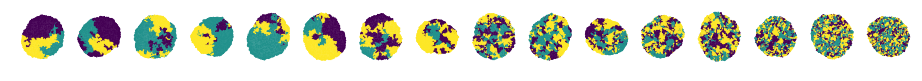

In [5]:
# plot single replicate for each batch
fig = sweep.plot_culture_grid(replicate_id=0, s=2)

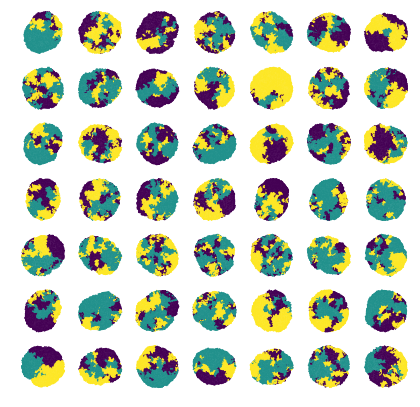

In [6]:
# plot all replicates for a single batch
fig = sweep.batches[0, 4].plot_culture_grid()

# load benchmarking results

In [7]:
benchmark = SweepBenchmark.load(sweep_path)

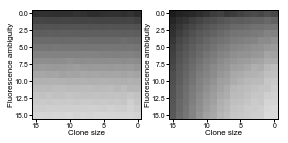

In [13]:
fig = benchmark.results.plot_absolute_error(log=True)

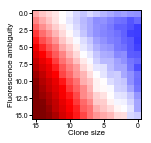

In [9]:
fig = benchmark.results.plot_relative_error()

In [14]:
benchmark.results.data.community.max()

0.1826097868229083

In [24]:
from matplotlib.colors import Normalize

vmax = np.percentile(benchmark.load_benchmark(0, benchmark.num_scales-1).classifier.values, 99)
norm = Normalize(vmin=0, vmax=vmax)

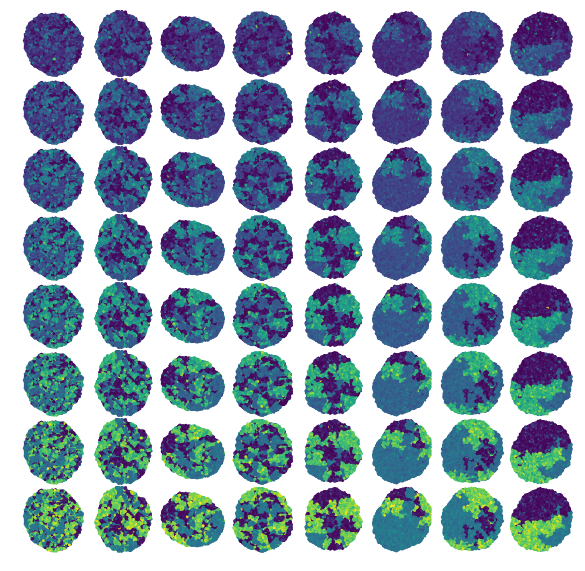

In [25]:
fig = benchmark.plot_fluorescence(resolution=2, s=4, figsize=(10, 10), cmap=plt.cm.viridis, norm=norm)

In [15]:
batch_id, scale_id = 0, 0
batch_benchmark = benchmark.load_benchmark(batch_id, scale_id)

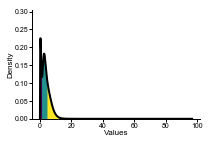

In [18]:
batch_benchmark.classifier.plot_pdf()

In [20]:
simulation_benchmark = batch_benchmark.benchmark_simulation(0)

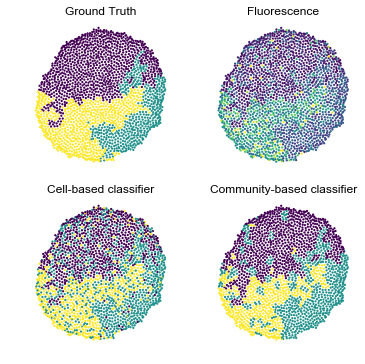

In [22]:
simulation_benchmark.show()

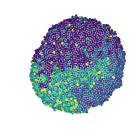

In [23]:
simulation_benchmark.plot_measurements(s=5)

In [ ]:
from growth.visualization.colorbars import ColorBar, ErrorColorBar
cbar = ColorBar(label='Change in Mean Absolute Error')
ebar = ErrorColorbar(vlim=(-8, 8), label='Fold-change in Mean Absolute Error')

In [31]:
simulation_benchmark.annotator.cell_classifier